In [1]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from pathlib import Path

In [2]:
# Load data
cwd = Path.cwd()
moondf = pickle.load(open(cwd / '..' / 'raw_data' / 'moonGen_scrape_2016_with_labels', 'rb'))

In [3]:
# Load data
cwd = Path.cwd()
moondf = pickle.load(open(cwd / '..' / 'raw_data' / 'moonGen_scrape_2016_with_labels', 'rb'))
# change the grade column from a number 4 - 14 to a list of 11 binary values
moondf['grade'] = moondf['grade'].apply(lambda x: [1 if i == x else 0 for i in range(4, 15)])
# one hot encode the grade column
grade_cols = ['V_' + str(i) for i in range(4, 15)]
moondf[grade_cols] = pd.DataFrame(moondf['grade'].to_list(), index=moondf.index)
y = moondf[grade_cols].values
X = moondf.drop(columns=grade_cols, axis=1)
X = X.drop(["is_benchmark", "repeats", "grade"], axis=1).values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model =  xgb.XGBClassifier(objective='multi:softprob', num_class=11, max_depth=5, n_estimators=1000, learning_rate=0.05, n_jobs=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))


XGBoostError: [13:58:42] /Users/runner/work/xgboost/xgboost/include/xgboost/objective.h:104: multioutput is not supported by current objective function
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000140a15355 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x0000000140bf5562 xgboost::ObjFunction::Targets(xgboost::MetaInfo const&) const + 82
  [bt] (2) 3   libxgboost.dylib                    0x0000000140b9962e xgboost::LearnerConfiguration::ConfigureTargets() + 142
  [bt] (3) 4   libxgboost.dylib                    0x0000000140b96e08 xgboost::LearnerConfiguration::ConfigureModelParamWithoutBaseScore() + 24
  [bt] (4) 5   libxgboost.dylib                    0x0000000140b87c01 xgboost::LearnerConfiguration::Configure() + 1233
  [bt] (5) 6   libxgboost.dylib                    0x0000000140b87f1a xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 106
  [bt] (6) 7   libxgboost.dylib                    0x0000000140a3738f XGBoosterUpdateOneIter + 143
  [bt] (7) 8   libffi.7.dylib                      0x0000000109d99ead ffi_call_unix64 + 85
  [bt] (8) 9   ???                                 0x0000000302bac3c0 0x0 + 12930696128



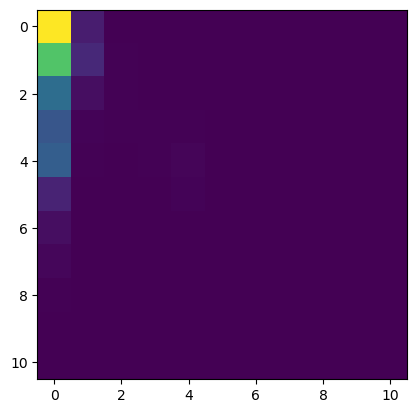

In [ ]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.imshow(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))